# Credit Card Fraud Detection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Check the amount of fradulent and non-fradulent transaction

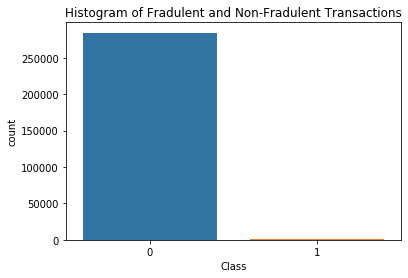

In [10]:
sns.countplot('Class', data=data)
plt.title('Histogram of Fradulent and Non-Fradulent Transactions')
plt.show()

In [11]:
print('No Frauds: ', round(data['Class'].value_counts()[0]/len(data) * 100,2), '%')
print('Frauds:', round(data['Class'].value_counts()[1]/len(data) * 100,2), '%')

No Frauds:  99.83 %
Frauds: 0.17 %


99.83% of the transaction in the datasets are non-fradulent. When creating a model on the entire dataset, the model may overfit. To prevent overfitting we create a sample where the number of fradulent and non-fradulent transactions are equal. 

In [12]:
# shuffle dataset
data = data.sample(frac=1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
76028,56362.0,1.116006,-0.025995,1.097629,2.564423,-0.613870,0.586278,-0.669844,0.326577,0.480265,...,-0.144436,-0.437186,-0.064028,-0.522100,0.325902,0.012288,0.021676,0.028708,34.97,0
264046,161238.0,-1.294921,2.050438,-1.279203,-1.055058,0.884961,-0.380670,0.936969,-0.050423,1.352204,...,0.077019,1.033992,-0.138503,-0.087180,-0.412243,-0.226728,0.679236,0.172518,0.89,0
40697,40359.0,-0.410381,1.096819,-0.026878,0.994127,0.381271,-1.238644,0.785967,-0.096025,-0.475072,...,0.123970,0.642627,0.242668,0.343223,-0.659214,-0.442232,0.047665,-0.083061,3.83,0
231471,146777.0,0.921560,-1.850690,-2.507724,0.830760,-0.306737,-0.589937,0.723417,-0.228607,1.165802,...,0.068218,-0.939649,-0.277111,0.463932,-0.302325,-0.168037,-0.124562,0.083909,583.12,0
36200,38433.0,1.185895,-1.100078,0.802142,-0.519271,-1.329392,0.061742,-0.976230,0.017040,-0.052650,...,0.145205,0.317018,-0.207993,-0.271363,0.440327,-0.166129,0.036611,0.040753,120.00,0


In [14]:
print("Number of fraudulent transaction:", data['Class'].value_counts()[1])

Number of fraudulent transaction: 492


In [122]:
nonfraud_data = data[data['Class']==0][:492]
fraud_data = data[data['Class']==1]

In [123]:
sample_data = pd.concat([nonfraud_data, fraud_data]) # combine two dataset
sample_data = sample_data.sample(frac=1) # shuffle dataset
sample_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
251866,155535.0,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,...,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,3.90,1
42528,41138.0,-4.595617,5.083690,-7.581015,7.546033,-6.949165,-1.729185,-8.190192,2.714670,-7.083169,...,2.248971,0.566844,0.033744,0.591783,0.334229,0.386801,2.163898,0.983104,340.11,1
125342,77627.0,-7.139060,2.773082,-6.757845,4.446456,-5.464428,-1.713401,-6.485365,3.409395,-3.053493,...,1.303250,-0.016118,-0.876670,0.382230,-1.054624,-0.614606,-0.766848,0.409424,106.90,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1
15736,27163.0,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,...,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,99.99,1


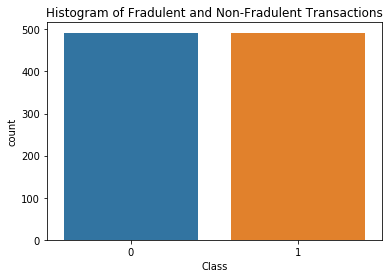

In [22]:
sns.countplot('Class', data=sample_data)
plt.title('Histogram of Fradulent and Non-Fradulent Transactions')
plt.show()

## Anomaly Detection

### Anomaly Detection Using Correlation

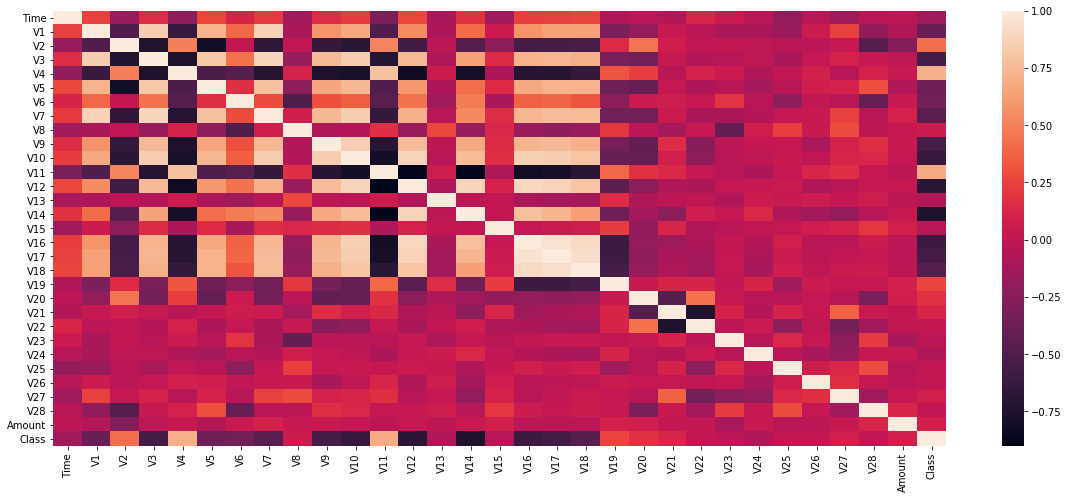

In [26]:
plt.figure(figsize=(20, 8))
sample_data_corr = sample_data.corr()
sns.heatmap(sample_data_corr)
plt.show()

From the heatmap we see the following: 
- V10, V12, V14, V16 are much more negatively correlated compared to the other variables
- V2, V4, V11 are more postively correlated compared to the other variable

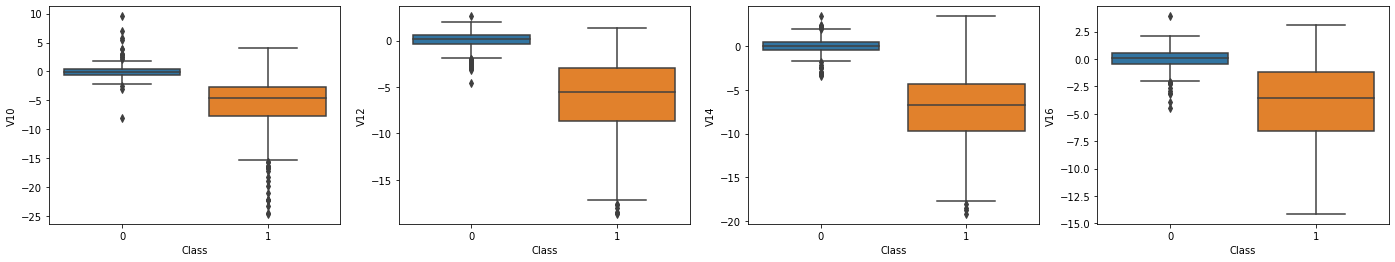

In [36]:
cols = ['V10', 'V12', 'V14', 'V16']
plt.figure(figsize = (24, 4))


for column in cols:
    index = cols.index(column)
    plt.subplot(1, 4, index+1)
    sns.boxplot(x="Class", y=column, data = sample_data)
plt.show()

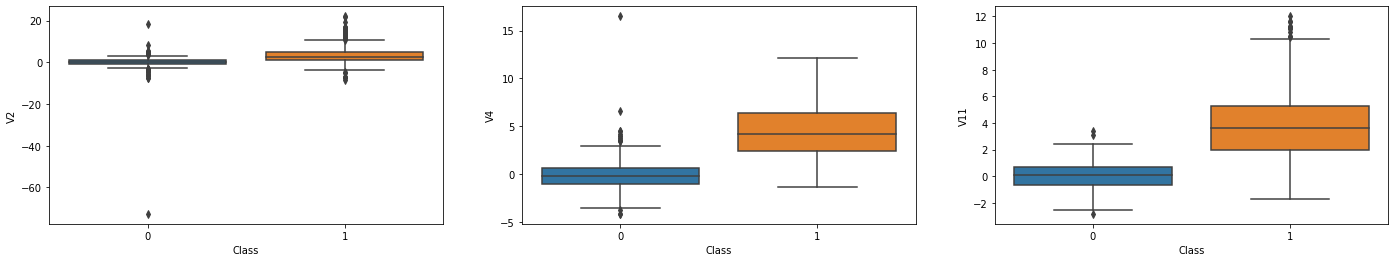

In [37]:
cols = ['V2', 'V4', 'V11']
plt.figure(figsize = (24, 4))


for column in cols:
    index = cols.index(column)
    plt.subplot(1, 3, index+1)
    sns.boxplot(x="Class", y=column, data = sample_data)
plt.show()

We remove extreme outliers from the column and replace them with the median value of the column to keep the number of column the same. The outliers are detemined using the Interquartile range. If the values are smaller than $Q_1 - 1.5 \times IQR$ or larger than $Q_3 + 1.5 \times IQR$, we consider the point as an outlier. We also see that the negatively correlated variables have more outliers.

### Anomaly Detection using PCA

In [141]:
from sklearn.decomposition import PCA

In [145]:
pca_data = sample_data.drop(columns=['Time'])

In [146]:
pca_data['Amount'] = (pca_data['Amount'] - pca_data['Amount'].mean()) / pca_data['Amount'].std()
pca_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
251866,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,-3.926510,...,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,-0.449783,1
42528,-4.595617,5.083690,-7.581015,7.546033,-6.949165,-1.729185,-8.190192,2.714670,-7.083169,-11.141278,...,2.248971,0.566844,0.033744,0.591783,0.334229,0.386801,2.163898,0.983104,1.066515,1
125342,-7.139060,2.773082,-6.757845,4.446456,-5.464428,-1.713401,-6.485365,3.409395,-3.053493,-6.260706,...,1.303250,-0.016118,-0.876670,0.382230,-1.054624,-0.614606,-0.766848,0.409424,0.014745,1
6427,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,-4.624985,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,-0.462862,1
15736,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,-8.442262,...,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,-0.016419,1


In [154]:
pca = PCA(n_components = 9)
pca_reduced = pca.fit_transform(pca_data)

In [156]:
print("Number of component:", len(pca_reduced[0]))

Number of component: 9


In [170]:
pca_reconstructed = pca.inverse_transform(pca_reduced)
mse = np.square(pca_reconstructed - pca_data).mean()
print(mse)

V1        0.071363
V2        0.150443
V3        0.372486
V4        0.162832
V5        0.450324
V6        0.988123
V7        0.436412
V8        0.115796
V9        1.065815
V10       0.700522
V11       0.893480
V12       0.982897
V13       1.004871
V14       0.528781
V15       0.862149
V16       0.590318
V17       0.414596
V18       0.471075
V19       0.852222
V20       0.584937
V21       0.241490
V22       0.420447
V23       1.004826
V24       0.288033
V25       0.356356
V26       0.221720
V27       0.668342
V28       0.436739
Amount    0.285723
Class     0.096361
dtype: float64


Since the reconstruction errors are relatively high, we can see that anomalies exists throughout the data.

### Anomaly Detection using Gaussian Mixture

In [157]:
from sklearn.mixture import GaussianMixture

In [159]:
gm = GaussianMixture(n_components=2, n_init=10)
gm.fit(sample_data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [161]:
densities = gm.score_samples(sample_data)
density_threshold = np.percentile(densities, 5)
anomalies = sample_data[densities < density_threshold]

In [166]:
print("Index of anomalies:", anomalies.index)

Index of anomalies: Int64Index([180930, 274382, 258264, 176049, 220215, 268698, 258403, 272521,
             76573, 274958,  82400,  33062, 100489, 233258,  10690, 181498,
            157918,  88628, 173735, 154286, 178405,  89190, 190471,  39769,
            212644, 154587,   6971, 158591, 247673, 119714, 255923, 123326,
            249607, 252805, 136965, 154684,  33276, 151601, 279762,  92264,
              2457,  47084, 101509,  38223,  83297],
           dtype='int64')


In [168]:
gm_data = sample_data.drop(anomalies.index)

# check to see if columns were dropped
gm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939 entries, 251866 to 151103
Data columns (total 31 columns):
Time      939 non-null float64
V1        939 non-null float64
V2        939 non-null float64
V3        939 non-null float64
V4        939 non-null float64
V5        939 non-null float64
V6        939 non-null float64
V7        939 non-null float64
V8        939 non-null float64
V9        939 non-null float64
V10       939 non-null float64
V11       939 non-null float64
V12       939 non-null float64
V13       939 non-null float64
V14       939 non-null float64
V15       939 non-null float64
V16       939 non-null float64
V17       939 non-null float64
V18       939 non-null float64
V19       939 non-null float64
V20       939 non-null float64
V21       939 non-null float64
V22       939 non-null float64
V23       939 non-null float64
V24       939 non-null float64
V25       939 non-null float64
V26       939 non-null float64
V27       939 non-null float64
V28       939 non-n

### Anomaly Detection using Fast-MCD

In [172]:
from sklearn.covariance import EllipticEnvelope

In [181]:
ee = EllipticEnvelope(support_fraction=0.7)
ee.fit(sample_data)
anomaly_ee = ee.score_samples(sample_data)

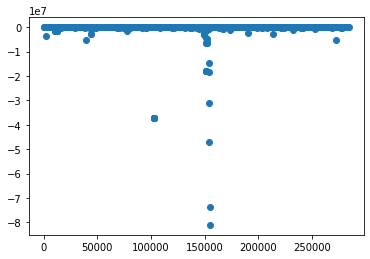

In [182]:
plt.scatter(sample_data.index, anomaly_ee)
plt.show()

In [195]:
# set threshold
distance_threshold = -0.5e+7
anomalies_ee = sample_data[anomaly_ee < distance_threshold]

In [197]:
mcd_data = sample_data.drop(anomalies_ee.index)
mcd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 251866 to 151103
Data columns (total 31 columns):
Time      962 non-null float64
V1        962 non-null float64
V2        962 non-null float64
V3        962 non-null float64
V4        962 non-null float64
V5        962 non-null float64
V6        962 non-null float64
V7        962 non-null float64
V8        962 non-null float64
V9        962 non-null float64
V10       962 non-null float64
V11       962 non-null float64
V12       962 non-null float64
V13       962 non-null float64
V14       962 non-null float64
V15       962 non-null float64
V16       962 non-null float64
V17       962 non-null float64
V18       962 non-null float64
V19       962 non-null float64
V20       962 non-null float64
V21       962 non-null float64
V22       962 non-null float64
V23       962 non-null float64
V24       962 non-null float64
V25       962 non-null float64
V26       962 non-null float64
V27       962 non-null float64
V28       962 non-n

## Select and Train a model

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC

In [200]:
from sklearn.model_selection import train_test_split

In [203]:
# standarize Amount Column for both table
gm_data['Amount'] = (gm_data['Amount'] - gm_data['Amount'].mean()) / gm_data['Amount'].std()
mcd_data['Amount'] = (mcd_data['Amount'] - mcd_data['Amount'].mean()) / mcd_data['Amount'].std()

In [204]:
# drop Time column
gm_data = gm_data.drop(columns=['Time'])
mcd_data = mcd_data.drop(columns=['Time'])

In [205]:
gm_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
251866,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,-3.926510,...,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,-0.476359,1
42528,-4.595617,5.083690,-7.581015,7.546033,-6.949165,-1.729185,-8.190192,2.714670,-7.083169,-11.141278,...,2.248971,0.566844,0.033744,0.591783,0.334229,0.386801,2.163898,0.983104,1.392728,1
125342,-7.139060,2.773082,-6.757845,4.446456,-5.464428,-1.713401,-6.485365,3.409395,-3.053493,-6.260706,...,1.303250,-0.016118,-0.876670,0.382230,-1.054624,-0.614606,-0.766848,0.409424,0.096247,1
6427,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,-4.624985,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,-0.492481,1
15736,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,-8.442262,...,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,0.057833,1


In [206]:
mcd_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
251866,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,-3.926510,...,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,-0.456248,1
42528,-4.595617,5.083690,-7.581015,7.546033,-6.949165,-1.729185,-8.190192,2.714670,-7.083169,-11.141278,...,2.248971,0.566844,0.033744,0.591783,0.334229,0.386801,2.163898,0.983104,1.065550,1
125342,-7.139060,2.773082,-6.757845,4.446456,-5.464428,-1.713401,-6.485365,3.409395,-3.053493,-6.260706,...,1.303250,-0.016118,-0.876670,0.382230,-1.054624,-0.614606,-0.766848,0.409424,0.009964,1
6427,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,-4.624985,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,-0.469375,1
15736,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,-8.442262,...,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,-0.021313,1


In [210]:
X_train, X_valid, y_train, y_valid = train_test_split(gm_data.loc[:, gm_data.columns != "Class"], 
                                                     gm_data[['Class']], test_size=0.2)

In [213]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

### Train with Gaussian Mixture data

In [216]:
# Logistic Regression
model = LogisticRegression().fit(X_train, y_train.values.ravel())
predict = model.predict(X_valid)
print("Accuracy Score:", accuracy_score(y_valid, predict))
print("Area under ROC:", roc_auc_score(y_valid, predict))
print("Confusion Matrix:", confusion_matrix(y_valid, predict))

Accuracy Score: 0.9468085106382979
Area under ROC: 0.9445964432284542
Confusion Matrix: [[99  3]
 [ 7 79]]


In [217]:
# RandomForestClassifier
model = RandomForestClassifier().fit(X_train, y_train.values.ravel())
predict = model.predict(X_valid)
print("Accuracy Score:", accuracy_score(y_valid, predict))
print("Area under ROC:", roc_auc_score(y_valid, predict))
print("Confusion Matrix:", confusion_matrix(y_valid, predict))

Accuracy Score: 0.9627659574468085
Area under ROC: 0.9602143182854537
Confusion Matrix: [[101   1]
 [  6  80]]


In [218]:
# AdaBoostClassifier
model = AdaBoostClassifier().fit(X_train, y_train.values.ravel())
predict = model.predict(X_valid)
print("Accuracy Score:", accuracy_score(y_valid, predict))
print("Area under ROC:", roc_auc_score(y_valid, predict))
print("Confusion Matrix:", confusion_matrix(y_valid, predict))

Accuracy Score: 0.9521276595744681
Area under ROC: 0.9522343821249429
Confusion Matrix: [[97  5]
 [ 4 82]]


In [219]:
# GradientBoostingClassifier
model = GradientBoostingClassifier().fit(X_train, y_train.values.ravel())
predict = model.predict(X_valid)
print("Accuracy Score:", accuracy_score(y_valid, predict))
print("Area under ROC:", roc_auc_score(y_valid, predict))
print("Confusion Matrix:", confusion_matrix(y_valid, predict))

Accuracy Score: 0.9627659574468085
Area under ROC: 0.961126310989512
Confusion Matrix: [[100   2]
 [  5  81]]


In [220]:
# KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train.values.ravel())
predict = model.predict(X_valid)
print("Accuracy Score:", accuracy_score(y_valid, predict))
print("Area under ROC:", roc_auc_score(y_valid, predict))
print("Confusion Matrix:", confusion_matrix(y_valid, predict))

Accuracy Score: 0.9521276595744681
Area under ROC: 0.9485864113087095
Confusion Matrix: [[101   1]
 [  8  78]]


In [223]:
# KMeans
model = KMeans(n_clusters=2).fit(X_train, y_train.values.ravel())
predict = model.predict(X_valid)
print("Accuracy Score:", accuracy_score(y_valid, predict))
print("Area under ROC:", roc_auc_score(y_valid, predict))
print("Confusion Matrix:", confusion_matrix(y_valid, predict))

Accuracy Score: 0.7021276595744681
Area under ROC: 0.6753305973552212
Confusion Matrix: [[101   1]
 [ 55  31]]


In [225]:
# SVC
model = SVC().fit(X_train, y_train.values.ravel())
predict = model.predict(X_valid)
print("Accuracy Score:", accuracy_score(y_valid, predict))
print("Area under ROC:", roc_auc_score(y_valid, predict))
print("Confusion Matrix:", confusion_matrix(y_valid, predict))

Accuracy Score: 0.9521276595744681
Area under ROC: 0.9485864113087095
Confusion Matrix: [[101   1]
 [  8  78]]


#### Neural Networks

In [226]:
import tensorflow as tf
from tensorflow import keras

In [228]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu", input_shape = X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                   callbacks=[early_stopping_cb])

Epoch 1/100
24/24 [==============================] - 0s 7ms/step - loss: 0.5453 - accuracy: 0.7364 - val_loss: 0.6535 - val_accuracy: 0.5319
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.8589 - val_loss: 0.4175 - val_accuracy: 0.8936
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.8881 - val_loss: 0.3098 - val_accuracy: 0.9628
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.9241 - val_loss: 0.2565 - val_accuracy: 0.9628
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9308 - val_loss: 0.2261 - val_accuracy: 0.9681
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1791 - accuracy: 0.9481 - val_loss: 0.2022 - val_accuracy: 0.9521
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1697 - accuracy: 0.9454 - val_loss: 0.1793 - val_accuracy: 0.9521
Epoch 8/100
2

In [233]:
y_pred = model.predict(X_valid)

predict = []
for arr in y_pred:
    if arr[1] >= arr[0]:
        predict.append(1)
    else:
        predict.append(0)
        
print("Accuracy Score:", accuracy_score(y_valid, predict))
print("Area under ROC:", roc_auc_score(y_valid, predict))
print("Confusion Matrix:", confusion_matrix(y_valid, predict))

Accuracy Score: 0.9627659574468085
Area under ROC: 0.961126310989512
Confusion Matrix: [[100   2]
 [  5  81]]


We see that the neural network model has the highest accuracy score on the validation set and the highest `roc_auc_score`. The confusion matrix also shows that the neural network model has been able to predict fradulent transactions accurately.

### Train with MCD Data

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(mcd_data.loc[:, mcd_data.columns != "Class"], 
                                                     mcd_data[['Class']], test_size=0.2)

In [234]:
model = LogisticRegression().fit(X_train, y_train.values.ravel())
predict = model.predict(X_valid)
print('Logistic Regression')
print("Accuracy Score:", accuracy_score(y_valid, predict))
print("Area under ROC:", roc_auc_score(y_valid, predict))
print("Confusion Matrix:", confusion_matrix(y_valid, predict))
print("\n")

model = RandomForestClassifier().fit(X_train, y_train.values.ravel())
predict = model.predict(X_valid)
print("RandomForestClassifier")
print("Accuracy Score:", accuracy_score(y_valid, predict))
print("Area under ROC:", roc_auc_score(y_valid, predict))
print("Confusion Matrix:", confusion_matrix(y_valid, predict))
print("\n")

model = AdaBoostClassifier().fit(X_train, y_train.values.ravel())
predict = model.predict(X_valid)
print("AdaBoostClassifer")
print("Accuracy Score:", accuracy_score(y_valid, predict))
print("Area under ROC:", roc_auc_score(y_valid, predict))
print("Confusion Matrix:", confusion_matrix(y_valid, predict))
print("\n")

model = GradientBoostingClassifier().fit(X_train, y_train.values.ravel())
predict = model.predict(X_valid)
print("GradientBoostingClassifier")
print("Accuracy Score:", accuracy_score(y_valid, predict))
print("Area under ROC:", roc_auc_score(y_valid, predict))
print("Confusion Matrix:", confusion_matrix(y_valid, predict))
print("\n")

model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train.values.ravel())
predict = model.predict(X_valid)
print("KNeighborsClassifier")
print("Accuracy Score:", accuracy_score(y_valid, predict))
print("Area under ROC:", roc_auc_score(y_valid, predict))
print("Confusion Matrix:", confusion_matrix(y_valid, predict))
print("\n")

model = KMeans(n_clusters=2).fit(X_train, y_train.values.ravel())
predict = model.predict(X_valid)
print("KMeans")
print("Accuracy Score:", accuracy_score(y_valid, predict))
print("Area under ROC:", roc_auc_score(y_valid, predict))
print("Confusion Matrix:", confusion_matrix(y_valid, predict))
print("\n")

model = SVC().fit(X_train, y_train.values.ravel())
predict = model.predict(X_valid)
print("SVC")
print("Accuracy Score:", accuracy_score(y_valid, predict))
print("Area under ROC:", roc_auc_score(y_valid, predict))
print("Confusion Matrix:", confusion_matrix(y_valid, predict))
print("\n")

Logistic Regression
Accuracy Score: 0.9468085106382979
Area under ROC: 0.9445964432284542
Confusion Matrix: [[99  3]
 [ 7 79]]


RandomForestClassifier
Accuracy Score: 0.9468085106382979
Area under ROC: 0.9445964432284542
Confusion Matrix: [[99  3]
 [ 7 79]]


AdaBoostClassifer
Accuracy Score: 0.9521276595744681
Area under ROC: 0.9522343821249429
Confusion Matrix: [[97  5]
 [ 4 82]]


GradientBoostingClassifier
Accuracy Score: 0.9627659574468085
Area under ROC: 0.961126310989512
Confusion Matrix: [[100   2]
 [  5  81]]


KNeighborsClassifier
Accuracy Score: 0.9521276595744681
Area under ROC: 0.9485864113087095
Confusion Matrix: [[101   1]
 [  8  78]]


KMeans
Accuracy Score: 0.2978723404255319
Area under ROC: 0.32466940264477884
Confusion Matrix: [[  1 101]
 [ 31  55]]


SVC
Accuracy Score: 0.9521276595744681
Area under ROC: 0.9485864113087095
Confusion Matrix: [[101   1]
 [  8  78]]




#### Neural Network Model

In [237]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu", input_shape = X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                   callbacks=[early_stopping_cb])

y_pred = model.predict(X_valid)

predict = []
for arr in y_pred:
    if arr[1] >= arr[0]:
        predict.append(1)
    else:
        predict.append(0)
        
print("Accuracy Score:", accuracy_score(y_valid, predict))
print("Area under ROC:", roc_auc_score(y_valid, predict))
print("Confusion Matrix:", confusion_matrix(y_valid, predict))

Epoch 1/100
24/24 [==============================] - 0s 5ms/step - loss: 0.8025 - accuracy: 0.6405 - val_loss: 0.5000 - val_accuracy: 0.7979
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8735 - val_loss: 0.3380 - val_accuracy: 0.9255
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2891 - accuracy: 0.9121 - val_loss: 0.2593 - val_accuracy: 0.9574
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.9161 - val_loss: 0.2238 - val_accuracy: 0.9574
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9254 - val_loss: 0.2023 - val_accuracy: 0.9574
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9281 - val_loss: 0.1833 - val_accuracy: 0.9574
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9254 - val_loss: 0.1657 - val_accuracy: 0.9574
Epoch 8/100
2

In [238]:
model.save("mcd_data_nn_model.h5")

Similar to the Gaussian Mixture dataset, the neural network model has the highest accuracy score and `roc_auc_score`. The confusion matrix also shows that only 6 predictions was not able to classify fradulent and non-fradulent transactions.

### Check Model using Actual Dataset

We remove the anomaly using the same condition when creating the `mcd_data`

In [240]:
ee_data = EllipticEnvelope(support_fraction=0.7)
ee_data.fit(data)
anomaly_ee = ee_data.score_samples(data)

[  -20.02908195 -1305.10818225  -157.98019098 ...   -11.33888017
   -27.70152042  -135.84353453]


In [241]:
print(len(anomaly_ee))

284807


In [243]:
# set threshold
distance_threshold = -0.5e+7
anomalies_ee = data[anomaly_ee < distance_threshold]

In [245]:
mcd_full_data = data.drop(anomalies_ee.index)
mcd_full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284473 entries, 76028 to 26721
Data columns (total 31 columns):
Time      284473 non-null float64
V1        284473 non-null float64
V2        284473 non-null float64
V3        284473 non-null float64
V4        284473 non-null float64
V5        284473 non-null float64
V6        284473 non-null float64
V7        284473 non-null float64
V8        284473 non-null float64
V9        284473 non-null float64
V10       284473 non-null float64
V11       284473 non-null float64
V12       284473 non-null float64
V13       284473 non-null float64
V14       284473 non-null float64
V15       284473 non-null float64
V16       284473 non-null float64
V17       284473 non-null float64
V18       284473 non-null float64
V19       284473 non-null float64
V20       284473 non-null float64
V21       284473 non-null float64
V22       284473 non-null float64
V23       284473 non-null float64
V24       284473 non-null float64
V25       284473 non-null float64
V2

In [260]:
train_data = data.loc[:, data.columns != "Class"]
test_data = data["Class"]

In [261]:
train_data['Amount'] = (train_data['Amount'] - train_data['Amount'].mean()) / train_data['Amount'].std()

<ipython-input-261-69395db0c7e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Amount'] = (train_data['Amount'] - train_data['Amount'].mean()) / train_data['Amount'].std()


In [262]:
train_data = train_data.drop(columns = ["Time"])
train_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
76028,1.116006,-0.025995,1.097629,2.564423,-0.613870,0.586278,-0.669844,0.326577,0.480265,0.540051,...,-0.199834,-0.144436,-0.437186,-0.064028,-0.522100,0.325902,0.012288,0.021676,0.028708,-0.213416
264046,-1.294921,2.050438,-1.279203,-1.055058,0.884961,-0.380670,0.936969,-0.050423,1.352204,1.762847,...,0.820265,0.077019,1.033992,-0.138503,-0.087180,-0.412243,-0.226728,0.679236,0.172518,-0.349670
40697,-0.410381,1.096819,-0.026878,0.994127,0.381271,-1.238644,0.785967,-0.096025,-0.475072,0.314928,...,-0.027236,0.123970,0.642627,0.242668,0.343223,-0.659214,-0.442232,0.047665,-0.083061,-0.337916
231471,0.921560,-1.850690,-2.507724,0.830760,-0.306737,-0.589937,0.723417,-0.228607,1.165802,-1.135152,...,0.921709,0.068218,-0.939649,-0.277111,0.463932,-0.302325,-0.168037,-0.124562,0.083909,1.978131
36200,1.185895,-1.100078,0.802142,-0.519271,-1.329392,0.061742,-0.976230,0.017040,-0.052650,0.373289,...,0.356496,0.145205,0.317018,-0.207993,-0.271363,0.440327,-0.166129,0.036611,0.040753,0.126541


In [265]:
final_model = keras.models.load_model("mcd_data_nn_model.h5")
y_pred = final_model.predict(train_data)

In [266]:
predict = []
for arr in y_pred:
    if arr[1] >= arr[0]:
        predict.append(1)
    else:
        predict.append(0)

In [267]:
print("Accuracy Score:", accuracy_score(test_data, predict))
print("Area under ROC:", roc_auc_score(test_data, predict))
print("Confusion Matrix:", confusion_matrix(test_data, predict))

Accuracy Score: 0.9610718837669018
Area under ROC: 0.955139721072571
Confusion Matrix: [[273253  11062]
 [    25    467]]


The final model was able to predict fradulent and non-fradulent transaction with an accuracy of 96.107%.